In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [26]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=9c3f6a2ab2494d439cffb9fb59307759c30c574de64166822ef213bfda6e8ce6
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320731 sha256=6cdfb79ace1ca99959fb37a832ea95eefd02ff9e30f9cda0c9b3e68d41d6401c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [30]:
import IPython.display as ipd
import librosa.display

In [28]:
filename="Downloads/ICBHI_final_database/101_1b1_Al_sc_Meditron.wav"

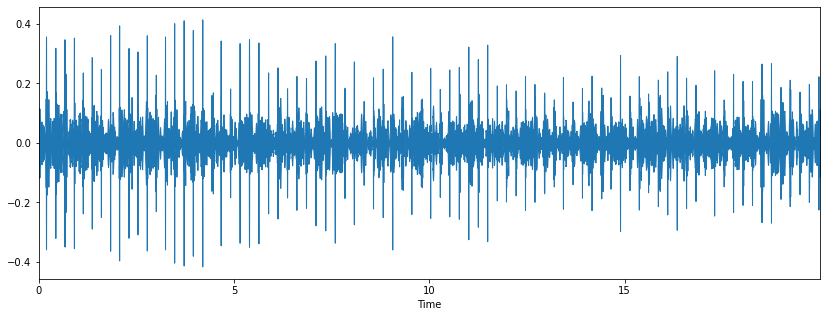

In [218]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)


In [32]:
sample_rate

22050

In [80]:
len(data)

441000

In [34]:
df=pd.read_table("Downloads/ICBHI_final_database/101_1b1_Al_sc_Meditron.txt")

In [35]:
df

,0.036,0.579,0,0.1
0,0.579,2.450,0,0
1,2.450,3.893,0,0
2,3.893,5.793,0,0
3,5.793,7.521,0,0
4,7.521,9.279,0,0
5,9.279,11.150,0,0
6,11.150,13.036,0,0
7,13.036,14.721,0,0
8,14.721,16.707,0,0
9,16.707,18.507,0,0


In [40]:
dempogr=pd.read_table("Downloads/demogr_info.txt",names=['id','age','sex','bmi','weight','height'])

In [41]:
resu=pd.read_table("Downloads/results.txt",names=['id_2','result'])

In [42]:
metadata=pd.concat([dempogr,resu],axis=1)

In [44]:
metadata.drop('id_2',axis=1,inplace=True)

In [45]:
metadata

,id,age,sex,bmi,weight,height,result
0,101,3.00,F,NaN,19.0,99.0,URTI
1,102,0.75,F,NaN,9.8,73.0,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma
3,104,70.00,F,28.47,NaN,NaN,COPD
4,105,7.00,F,NaN,32.0,135.0,URTI
...,...,...,...,...,...,...,...
121,222,60.00,M,NaN,NaN,NaN,COPD
122,223,NaN,NaN,NaN,NaN,NaN,COPD
123,224,10.00,F,NaN,32.3,143.0,Healthy
124,225,0.83,M,NaN,7.8,74.0,Healthy


In [48]:
metadata['bmi']=metadata.bmi.fillna(metadata['bmi'].mean())

In [50]:
metadata['weight']=metadata.weight.fillna(metadata['weight'].mean())
metadata['height']=metadata.height.fillna(metadata['height'].mean())

In [57]:
metadata.isna().sum()

id        0
age       0
sex       0
bmi       0
weight    0
height    0
result    0
dtype: int64

In [53]:
metadata['age']=metadata.age.fillna(metadata['age'].mean())


In [55]:
metadata['sex']=metadata.sex.fillna('M')

In [56]:
metadata

,id,age,sex,bmi,weight,height,result
0,101,3.00000,F,27.19,19.000000,99.000000,URTI
1,102,0.75000,F,27.19,9.800000,73.000000,Healthy
2,103,70.00000,F,33.00,21.361136,104.652381,Asthma
3,104,70.00000,F,28.47,21.361136,104.652381,COPD
4,105,7.00000,F,27.19,32.000000,135.000000,URTI
...,...,...,...,...,...,...,...
121,222,60.00000,M,27.19,21.361136,104.652381,COPD
122,223,42.99264,M,27.19,21.361136,104.652381,COPD
123,224,10.00000,F,27.19,32.300000,143.000000,Healthy
124,225,0.83000,M,27.19,7.800000,74.000000,Healthy


In [58]:
import os

In [59]:
audio_data_path='Downloads/ICBHI_final_database/'

In [60]:
def feature_ext(file):
    audio,sample_rate=librosa.load(file,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled=np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled

In [61]:
mfccs_features=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfccs_scaled=np.mean(mfccs_features.T,axis=0)

In [217]:
mfccs_features[0]

array([-429.15536, -477.63156, -526.2687 , -529.7153 , -533.7983 ,
       -533.643  , -535.40454, -520.2185 , -507.51968, -513.11835,
       -527.7089 , -527.62463, -532.0954 , -533.5824 , -524.5025 ,
       -525.08264, -527.2478 , -523.4549 , -498.96326, -500.17947,
       -516.5241 , -523.52795, -537.3216 , -542.12024, -551.4887 ,
       -563.4419 , -566.56573, -548.3661 , -526.3532 , -525.7495 ,
       -535.1517 , -531.5554 , -527.5031 , -525.0371 , -522.0987 ,
       -519.5982 , -517.1604 , -514.7002 , -493.3645 , -481.92383,
       -492.3532 , -504.40656, -515.1149 , -511.4141 , -508.4586 ,
       -509.61182, -512.216  , -512.8392 , -504.61795, -500.6025 ,
       -502.4359 , -506.61188, -508.3836 , -508.4511 , -519.0747 ,
       -519.92664, -524.1374 , -457.10587, -426.68222, -466.2618 ,
       -519.75134, -507.5871 , -528.28876, -553.3881 , -559.49365,
       -565.8319 , -564.9209 , -549.9062 , -520.14417, -508.45248,
       -523.46014, -542.77765, -549.8659 , -546.58484, -543.02

In [93]:
files=[]

In [94]:

for a in range(101,227):
    fileo=[]
    for i in os.listdir(audio_data_path):
    
        if os.path.isfile(os.path.join(audio_data_path,i)) and str(a) in i and '.wav' in i:
            fileo.append(audio_data_path+i)
    files.append(fileo)        
            

In [77]:
files

[['Downloads/ICBHI_final_database/101_1b1_Al_sc_Meditron.wav',
  'Downloads/ICBHI_final_database/101_1b1_Pr_sc_Meditron.wav'],
 ['Downloads/ICBHI_final_database/102_1b1_Ar_sc_Meditron.wav'],
 ['Downloads/ICBHI_final_database/103_2b2_Ar_mc_LittC2SE.wav'],
 ['Downloads/ICBHI_final_database/104_1b1_Al_sc_Litt3200.wav',
  'Downloads/ICBHI_final_database/104_1b1_Ar_sc_Litt3200.wav',
  'Downloads/ICBHI_final_database/104_1b1_Ll_sc_Litt3200.wav',
  'Downloads/ICBHI_final_database/104_1b1_Lr_sc_Litt3200.wav',
  'Downloads/ICBHI_final_database/104_1b1_Pl_sc_Litt3200.wav',
  'Downloads/ICBHI_final_database/104_1b1_Pr_sc_Litt3200.wav'],
 ['Downloads/ICBHI_final_database/105_1b1_Tc_sc_Meditron.wav'],
 ['Downloads/ICBHI_final_database/106_2b1_Pl_mc_LittC2SE.wav',
  'Downloads/ICBHI_final_database/106_2b1_Pr_mc_LittC2SE.wav'],
 ['Downloads/ICBHI_final_database/107_2b3_Al_mc_AKGC417L.wav',
  'Downloads/ICBHI_final_database/107_2b3_Ar_mc_AKGC417L.wav',
  'Downloads/ICBHI_final_database/107_2b3_Ll_mc_A

In [83]:
from pydub import AudioSegment

C:\Users\User\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [82]:
!pip install pydub

In [96]:
files_final=[]

In [97]:
f=101

In [98]:
for a in files:
    
    s1=AudioSegment.from_wav(a[0])
    for b in a[1:]:
        s1=s1+AudioSegment.from_wav(b)
    s1.export(str(f)+".wav",format='wav') 
    files_final.append(str(f)+".wav")
    f+=1
        

In [95]:
len(files)

126

In [99]:
files_final

['101.wav',
 '102.wav',
 '103.wav',
 '104.wav',
 '105.wav',
 '106.wav',
 '107.wav',
 '108.wav',
 '109.wav',
 '110.wav',
 '111.wav',
 '112.wav',
 '113.wav',
 '114.wav',
 '115.wav',
 '116.wav',
 '117.wav',
 '118.wav',
 '119.wav',
 '120.wav',
 '121.wav',
 '122.wav',
 '123.wav',
 '124.wav',
 '125.wav',
 '126.wav',
 '127.wav',
 '128.wav',
 '129.wav',
 '130.wav',
 '131.wav',
 '132.wav',
 '133.wav',
 '134.wav',
 '135.wav',
 '136.wav',
 '137.wav',
 '138.wav',
 '139.wav',
 '140.wav',
 '141.wav',
 '142.wav',
 '143.wav',
 '144.wav',
 '145.wav',
 '146.wav',
 '147.wav',
 '148.wav',
 '149.wav',
 '150.wav',
 '151.wav',
 '152.wav',
 '153.wav',
 '154.wav',
 '155.wav',
 '156.wav',
 '157.wav',
 '158.wav',
 '159.wav',
 '160.wav',
 '161.wav',
 '162.wav',
 '163.wav',
 '164.wav',
 '165.wav',
 '166.wav',
 '167.wav',
 '168.wav',
 '169.wav',
 '170.wav',
 '171.wav',
 '172.wav',
 '173.wav',
 '174.wav',
 '175.wav',
 '176.wav',
 '177.wav',
 '178.wav',
 '179.wav',
 '180.wav',
 '181.wav',
 '182.wav',
 '183.wav',
 '18

In [102]:
mfcc=[]
for a in files_final:
    mfcc.append(feature_ext(a))
    print(f)
    f+=1

227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352


In [103]:
mfcc

[array([-541.4069   ,   89.70246  ,   61.469093 ,   39.27539  ,
          31.080666 ,   29.563421 ,   25.827477 ,   20.049469 ,
          16.747404 ,   16.03901  ,   13.73474  ,    8.912672 ,
           5.464833 ,    6.333486 ,    9.07245  ,    9.609109 ,
           7.099415 ,    4.089983 ,    2.837117 ,    3.5246322,
           5.057686 ,    6.3538637,    6.5998974,    5.3529935,
           3.1029227,    1.3705429,    1.3186367,    2.5666783,
           3.7667832,    3.9256442,    3.0970612,    2.0043   ,
           1.312427 ,    1.3094487,    1.8286544,    2.335283 ,
           2.3648648,    2.019037 ,    1.8268229,    2.0449982],
       dtype=float32),
 array([-596.95496   ,  116.08523   ,   60.69329   ,   25.557758  ,
          26.208939  ,   38.514072  ,   36.050953  ,   18.642033  ,
           3.5326757 ,    0.80902225,    5.735795  ,    9.658902  ,
           9.136521  ,    5.5313864 ,    2.170032  ,    2.1036115 ,
           5.2476177 ,    7.931124  ,    7.100749  ,    4.055834

In [107]:
df_2=pd.DataFrame(mfcc)

In [109]:
df=pd.concat([metadata,df_2],axis=1)

In [110]:
df

,id,age,sex,bmi,weight,height,result,0,1,2,...,30,31,32,33,34,35,36,37,38,39
0,101,3.00000,F,27.19,19.000000,99.000000,URTI,-541.406921,89.702461,61.469093,...,3.097061,2.004300,1.312427,1.309449,1.828654,2.335283,2.364865,2.019037,1.826823,2.044998
1,102,0.75000,F,27.19,9.800000,73.000000,Healthy,-596.954956,116.085228,60.693291,...,1.290531,1.299072,2.338443,3.126305,2.461021,1.244334,1.296518,2.598844,3.337842,2.632271
2,103,70.00000,F,33.00,21.361136,104.652381,Asthma,-418.957977,68.036446,48.221279,...,3.875125,4.289333,4.378022,4.041772,3.683123,3.385960,2.966375,2.508658,2.254101,2.206172
3,104,70.00000,F,28.47,21.361136,104.652381,COPD,-406.346405,72.054436,56.553768,...,0.652078,0.961252,1.486922,2.003757,2.404717,2.692584,2.890271,2.980814,2.928594,2.734237
4,105,7.00000,F,27.19,32.000000,135.000000,URTI,-362.211578,188.732147,12.868785,...,1.460112,3.783420,1.300561,1.448717,2.145033,2.092233,1.508005,1.919643,0.735431,4.579628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,222,60.00000,M,27.19,21.361136,104.652381,COPD,-365.741730,85.569290,51.345566,...,0.766698,0.108553,0.914168,2.515868,4.074351,4.929878,4.640002,3.183922,1.221021,-0.157840
122,223,42.99264,M,27.19,21.361136,104.652381,COPD,-382.061737,69.255539,47.140549,...,1.656696,1.717270,2.785267,3.170164,3.664604,4.191261,3.382975,2.426984,2.222613,1.532161
123,224,10.00000,F,27.19,32.300000,143.000000,Healthy,-532.071655,71.316795,53.853989,...,2.862255,2.560142,2.479028,2.552071,2.633763,2.622807,2.548032,2.471853,2.389194,2.302308
124,225,0.83000,M,27.19,7.800000,74.000000,Healthy,-533.665649,98.949570,56.085827,...,4.425666,2.546077,0.726182,0.163019,1.027419,2.620606,3.736317,3.592804,2.611491,1.558027


In [120]:
dummy=pd.get_dummies(df['sex'])

In [121]:
dummy.drop('M',axis=1,inplace=True)

In [123]:
df['sex']=dummy

In [124]:
df

,id,age,sex,bmi,weight,height,result,0,1,2,...,30,31,32,33,34,35,36,37,38,39
0,101,3.00000,1,27.19,19.000000,99.000000,URTI,-541.406921,89.702461,61.469093,...,3.097061,2.004300,1.312427,1.309449,1.828654,2.335283,2.364865,2.019037,1.826823,2.044998
1,102,0.75000,1,27.19,9.800000,73.000000,Healthy,-596.954956,116.085228,60.693291,...,1.290531,1.299072,2.338443,3.126305,2.461021,1.244334,1.296518,2.598844,3.337842,2.632271
2,103,70.00000,1,33.00,21.361136,104.652381,Asthma,-418.957977,68.036446,48.221279,...,3.875125,4.289333,4.378022,4.041772,3.683123,3.385960,2.966375,2.508658,2.254101,2.206172
3,104,70.00000,1,28.47,21.361136,104.652381,COPD,-406.346405,72.054436,56.553768,...,0.652078,0.961252,1.486922,2.003757,2.404717,2.692584,2.890271,2.980814,2.928594,2.734237
4,105,7.00000,1,27.19,32.000000,135.000000,URTI,-362.211578,188.732147,12.868785,...,1.460112,3.783420,1.300561,1.448717,2.145033,2.092233,1.508005,1.919643,0.735431,4.579628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,222,60.00000,0,27.19,21.361136,104.652381,COPD,-365.741730,85.569290,51.345566,...,0.766698,0.108553,0.914168,2.515868,4.074351,4.929878,4.640002,3.183922,1.221021,-0.157840
122,223,42.99264,0,27.19,21.361136,104.652381,COPD,-382.061737,69.255539,47.140549,...,1.656696,1.717270,2.785267,3.170164,3.664604,4.191261,3.382975,2.426984,2.222613,1.532161
123,224,10.00000,1,27.19,32.300000,143.000000,Healthy,-532.071655,71.316795,53.853989,...,2.862255,2.560142,2.479028,2.552071,2.633763,2.622807,2.548032,2.471853,2.389194,2.302308
124,225,0.83000,0,27.19,7.800000,74.000000,Healthy,-533.665649,98.949570,56.085827,...,4.425666,2.546077,0.726182,0.163019,1.027419,2.620606,3.736317,3.592804,2.611491,1.558027


In [111]:
from sklearn.model_selection import train_test_split

In [151]:
y['Healthy']

0      0
1      1
2      0
3      0
4      0
      ..
121    0
122    0
123    1
124    1
125    0
Name: Healthy, Length: 126, dtype: uint8

In [125]:
x=df.drop(['result'],axis=1)

In [149]:
y=df['result']

In [150]:
y=pd.get_dummies(y)

In [152]:
y=y['Healthy']

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [154]:
x_test

,id,age,sex,bmi,weight,height,0,1,2,3,...,30,31,32,33,34,35,36,37,38,39
124,225,0.83,0,27.19,7.800000,74.000000,-533.665649,98.949570,56.085827,30.692842,...,4.425666,2.546077,0.726182,0.163019,1.027419,2.620606,3.736317,3.592804,2.611491,1.558027
79,180,93.00,0,29.03,21.361136,104.652381,-299.621765,151.678894,57.414238,32.292885,...,1.572655,0.966679,0.474877,1.499213,0.273126,-0.214494,0.375671,0.646666,1.392021,0.586797
71,172,73.00,0,29.30,21.361136,104.652381,-310.453430,106.825958,50.792538,36.952530,...,2.040276,2.117922,2.598808,2.182363,1.249618,0.376577,0.447314,0.771017,0.783666,1.338144
8,109,84.00,1,33.53,21.361136,104.652381,-435.574585,57.094528,48.412128,37.223049,...,2.140987,2.379989,2.733403,3.023891,3.138129,3.033345,2.733873,2.319826,1.893823,1.534749
13,114,77.00,0,23.12,21.361136,104.652381,-343.610687,127.966537,60.489883,23.225491,...,0.393637,0.679759,1.130021,0.475394,-0.071845,-0.135122,-0.303979,0.329736,1.298549,0.578422
32,133,68.00,0,27.40,21.361136,104.652381,-291.040253,116.533577,52.222515,38.840199,...,1.138166,1.768411,2.260886,1.426081,0.764513,1.506405,2.094396,1.818944,1.081085,1.284046
78,179,10.00,1,27.19,15.000000,104.000000,-474.843231,64.325829,44.435066,29.459318,...,3.105653,3.459080,3.044417,2.913162,2.225098,3.073238,2.439408,2.624983,1.592256,2.613899
7,108,3.00,0,27.19,21.361136,104.652381,-541.378418,68.537727,59.600574,50.446003,...,3.927507,3.518332,3.023703,2.569170,2.203011,1.938610,1.816636,1.828862,1.841235,1.715281
24,125,14.00,0,27.19,62.000000,170.000000,-400.582428,139.779053,37.706932,6.893724,...,4.277649,3.562859,2.354346,2.327078,2.915551,3.380756,2.719666,1.280982,1.208609,2.114101
116,217,12.00,1,27.19,21.361136,104.652381,-528.604553,122.821907,56.467842,9.589715,...,3.775977,1.725751,2.468101,-0.786326,8.837416,-0.564175,3.710418,0.520383,3.731364,2.509561


In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [156]:
y_test

124    1
79     0
71     0
8      0
13     0
32     0
78     1
7      0
24     1
116    1
66     0
37     0
106    0
76     0
97     0
64     0
23     0
55     0
65     0
42     1
52     1
107    1
100    0
41     0
95     0
40     0
Name: Healthy, dtype: uint8

In [163]:
model=Sequential()
model.add(Dense(100,input_shape=(46,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [164]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4700      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 45,101
Trainable params: 45,101
Non-trainable params: 0
__________________________________________________

In [165]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [172]:

num_epoches=50
num_batch_size=80
model.fit(x_train,y_train,batch_size=num_batch_size,epochs=num_epoches)

Epoch 1/50
2/2 [==============================] - 0s 16ms/step - loss: 0.2130 - accuracy: 0.8900
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2739 - accuracy: 0.8200
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2228 - accuracy: 0.8600
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2176 - accuracy: 0.8700
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 0.2257 - accuracy: 0.9000
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2558 - accuracy: 0.8400
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 0.2916 - accuracy: 0.8900
Epoch 8/50
2/2 [==============================] - 0s 14ms/step - loss: 0.3154 - accuracy: 0.9000
Epoch 9/50
2/2 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.83 - 0s 10ms/step - loss: 0.3809 - accuracy: 0.8200
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2949 - accuracy:

In [173]:
test_accuarcy=model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 0s/step - loss: 0.3150 - accuracy: 0.8077


In [204]:
pred=model.predict(x_train)

In [205]:
predi=[]

In [206]:
for a in pred:
    for c in a:
        predi.append(round(c))
        

In [207]:
predi

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [198]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [208]:
accuracy_score(y_train,predi)

0.95

In [209]:
con=confusion_matrix(y_train,predi)

In [210]:
import seaborn as sn

<AxesSubplot:>

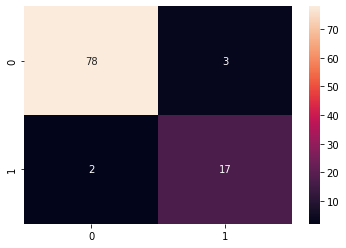

In [211]:
sn.heatmap(con,annot=True)